In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Lung Cancer/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Lung Cancer/cancer patient data sets.csv


### Importing the dataset

In [2]:
data = pd.read_csv('DataSets/Lung Cancer/cancer patient data sets.csv')
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Description of Dataset

1. Age The age of the patient. (Numeric)
2. Gender The gender of the patient. (Categorical)
3. Air Pollution The level of air pollution exposure of the patient. (Categorical)
4. Alcohol use The level of alcohol use of the patient. (Categorical)
5. Dust Allergy The level of dust allergy of the patient. (Categorical)
6. OccuPational Hazards The level of occupational hazards of the patient. (Categorical)
7. Genetic Risk The level of genetic risk of the patient. (Categorical)
8. chronic Lung Disease The level of chronic lung disease of the patient. (Categorical)
9. Balanced Diet The level of balanced diet of the patient. (Categorical)
10. Obesity The level of obesity of the patient. (Categorical)
11. Smoking The level of smoking of the patient. (Categorical)
12. Passive Smoker The level of passive smoker of the patient. (Categorical)
13. Chest Pain The level of chest pain of the patient. (Categorical)
14. Coughing of Blood The level of coughing of blood of the patient. (Categorical)
15. Fatigue The level of fatigue of the patient. (Categorical)
16. Weight Loss The level of weight loss of the patient. (Categorical)
17. Shortness of Breath The level of shortness of breath of the patient. (Categorical)
18. Wheezing The level of wheezing of the patient. (Categorical)
19. Swallowing Difficulty The level of swallowing difficulty of the patient. (Categorical)
20. Clubbing of Finger Nails The level of clubbing of finger nails of the patient. (Categorical)

### EDA of dataset

### Check null and duplicate entries in dataset

In [3]:
## checking null records
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [4]:
## for duplicate entries
data = data.drop_duplicates()
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### Drop unwanted columns

In [6]:
## No, need of index and Patient Id columns
data.drop(columns = ['index', 'Patient Id'], axis = 1, inplace=True)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### Now, convert column Level(dependent variable) from category to int

In [8]:
data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [9]:
## Now, apply LabelEncoding for this Level column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Level'] = le.fit_transform(data['Level'])

### Visualize the dataset

<Figure size 3000x2400 with 0 Axes>

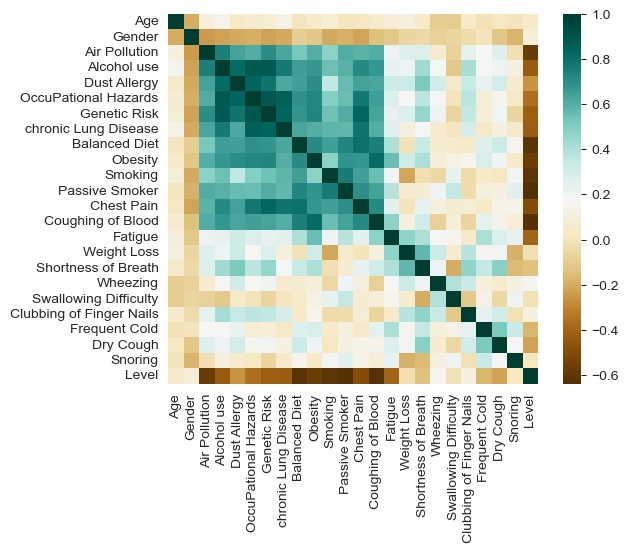

<Figure size 3000x2400 with 0 Axes>

In [10]:
sns.heatmap(data.corr(), square = True, cmap = 'BrBG')
plt.figure(figsize=(30,24))

In [11]:
df_corr = pd.DataFrame({
    'Column1' : [],
    'Column2' : [],
    'Correlation between two' : []
})

In [12]:
## Now, we finding correlation between each columns to find which features are highly correlated
li = []
for col1 in data.columns:
    max1 = 0
    column1 = ''
    column2 = ''
    df = []
    for col2 in data.columns:
        if col1!=col2:
            corr1 = data[col1].corr(data[col2])
            if corr1 > max1:
                max1 = corr1
                df = {
                    'column1' : col1,
                    'column2' : col2,
                    'correlation between two'  :  corr1
                }
    li.append(df)
df1 = pd.DataFrame(li)
df1 = df1.sort_values(by = ['correlation between two'], ascending = False)
df1

,column1,column2,correlation between two
5,OccuPational Hazards,Genetic Risk,0.893049
6,Genetic Risk,OccuPational Hazards,0.893049
3,Alcohol use,OccuPational Hazards,0.878786
7,chronic Lung Disease,OccuPational Hazards,0.858284
4,Dust Allergy,OccuPational Hazards,0.835860
12,Chest Pain,Genetic Risk,0.831751
13,Coughing of Blood,Obesity,0.814805
9,Obesity,Coughing of Blood,0.814805
8,Balanced Diet,Chest Pain,0.798207
11,Passive Smoker,Smoking,0.761622


### Spliting the dataset into training and testing

In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [15]:
X_train.shape

(800, 23)

In [16]:
X_test.shape

(200, 23)

### Feature Scaling of dataset¶

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the model using LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[75  0  0]
 [ 0 67  0]
 [ 0  0 58]]
1.0


it means this model has accuracy 100% and able to predict all testset data

**if you want to work on any other model, please comment**

**if you like my work, please upvote the notebook**